In [11]:
# Import libraries
import tensorflow as tf
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from itertools import product
from keras.datasets import fashion_mnist
from keras.utils import to_categorical
from keras.models import Sequential
from keras import layers
from keras import models
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Dropout

In [3]:
# Load fashion mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [4]:
# summarize loaded dataset
print('Train: x=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: x=%s, y=%s' % (x_test.shape, y_test.shape))

Train: x=(60000, 28, 28), y=(60000,)
Test: x=(10000, 28, 28), y=(10000,)


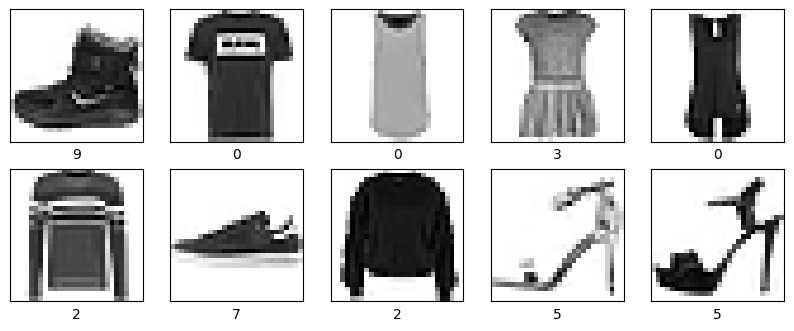

In [5]:
# Data Exploration
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])

In [6]:
# Reshaping the images
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalizing the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

In [7]:
# One-hot encoding to convert integer data into categorical data
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

print('Labels: y_train=%s, y_test=%s' % (y_train.shape, y_test.shape))

Labels: y_train=(60000, 10), y_test=(10000, 10)


In [ ]:
# Load fashion mnist dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Reshaping the images
x_train = x_train.reshape((60000, 28, 28, 1))
x_test = x_test.reshape((10000, 28, 28, 1))

# Normalizing the images
x_train = x_train.astype('float32')/255
x_test = x_test.astype('float32')/255

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)


In [82]:
# Defining the CNN models
net = models.Sequential()
net.add(Conv2D(32,kernel_size=2, activation='relu', input_shape=(28,28,1))) # Input Layer
net.add(MaxPooling2D((2, 2)))
net.add(Dropout(0.3))
net.add(Conv2D(64, kernel_size=2, activation='relu'))
net.add(MaxPooling2D((2, 2)))
net.add(Dropout(0.3))
net.add(Flatten())
net.add(Dense(128, activation='relu'))
net.add(Dense(10, activation='softmax')) # Output Layer
# Model Summary
net.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_33 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 13, 13, 32)       0         
 g2D)                                                            
                                                                 
 dropout_33 (Dropout)        (None, 13, 13, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 12, 12, 64)        8256      
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 6, 6, 64)         0         
 g2D)                                                            
                                                                 
 dropout_34 (Dropout)        (None, 6, 6, 64)        

In [83]:
# Compiling model
net.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics=['accuracy'])

In [84]:
history = net.fit(x_train, y_train, epochs = 20, batch_size = 150, validation_split=0.2)

Epoch 1/20
320/320 [==============================] - 4s 7ms/step - loss: 0.6404 - accuracy: 0.7677 - val_loss: 0.4397 - val_accuracy: 0.8442
Epoch 2/20
320/320 [==============================] - 2s 6ms/step - loss: 0.4233 - accuracy: 0.8469 - val_loss: 0.3591 - val_accuracy: 0.8721
Epoch 3/20
320/320 [==============================] - 2s 5ms/step - loss: 0.3781 - accuracy: 0.8632 - val_loss: 0.3322 - val_accuracy: 0.8825
Epoch 4/20
320/320 [==============================] - 2s 5ms/step - loss: 0.3491 - accuracy: 0.8726 - val_loss: 0.3290 - val_accuracy: 0.8837
Epoch 5/20
320/320 [==============================] - 2s 5ms/step - loss: 0.3243 - accuracy: 0.8826 - val_loss: 0.2996 - val_accuracy: 0.8938
Epoch 6/20
320/320 [==============================] - 2s 5ms/step - loss: 0.3098 - accuracy: 0.8859 - val_loss: 0.2849 - val_accuracy: 0.8983
Epoch 7/20
320/320 [==============================] - 2s 5ms/step - loss: 0.2929 - accuracy: 0.8927 - val_loss: 0.2749 - val_accuracy: 0.9027
Epoch 

In [85]:
testing_loss, testing_accuracy = net.evaluate(x_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2363 - accuracy: 0.9152


In [56]:
print("Model accuracy: %.2f"% (testing_accuracy*100)) 

Model accuracy: 91.69


<ipython-input-105-c5232ad6621f>:2: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1, 2, 1)


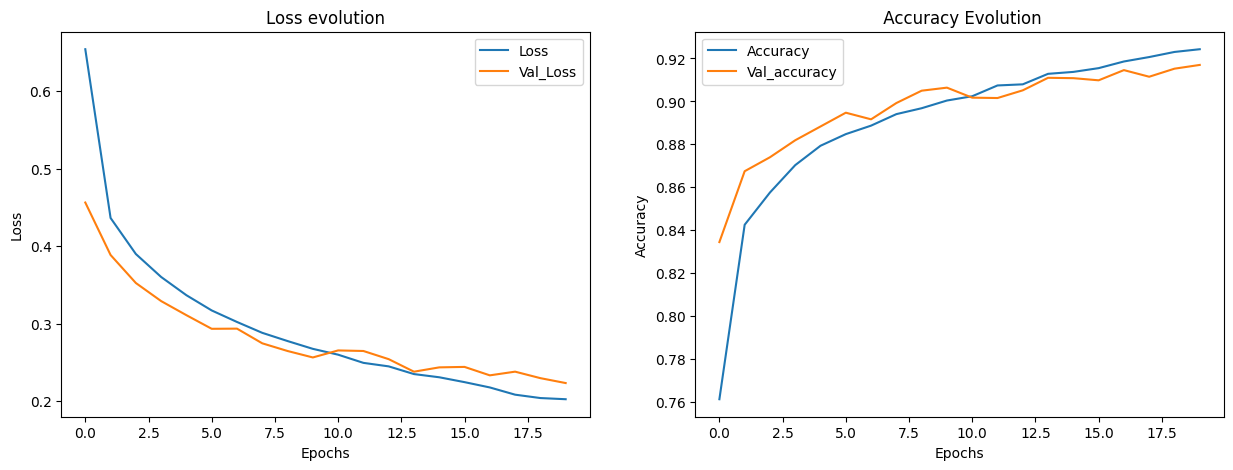

In [ ]:
plt.subplots(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Val_Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Loss evolution')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Val_accuracy')
plt.title(" Accuracy Evolution")
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [91]:
classes = ['T-shirt/Top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle Boot']

#Create Multiclass Confusion Matrix
preds = net.predict(x_test)

print(classification_report(np.argmax(y_test,axis=1), np.argmax(preds,axis=1), target_names= classes))

313/313 [==============================] - 1s 2ms/step
              precision    recall  f1-score   support

 T-shirt/Top       0.87      0.86      0.86      1000
     Trouser       1.00      0.98      0.99      1000
    Pullover       0.85      0.90      0.87      1000
       Dress       0.92      0.92      0.92      1000
        Coat       0.87      0.88      0.87      1000
      Sandal       0.99      0.98      0.99      1000
       Shirt       0.76      0.73      0.74      1000
     Sneaker       0.93      0.99      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle Boot       0.99      0.93      0.96      1000

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.91     10000
weighted avg       0.92      0.92      0.91     10000



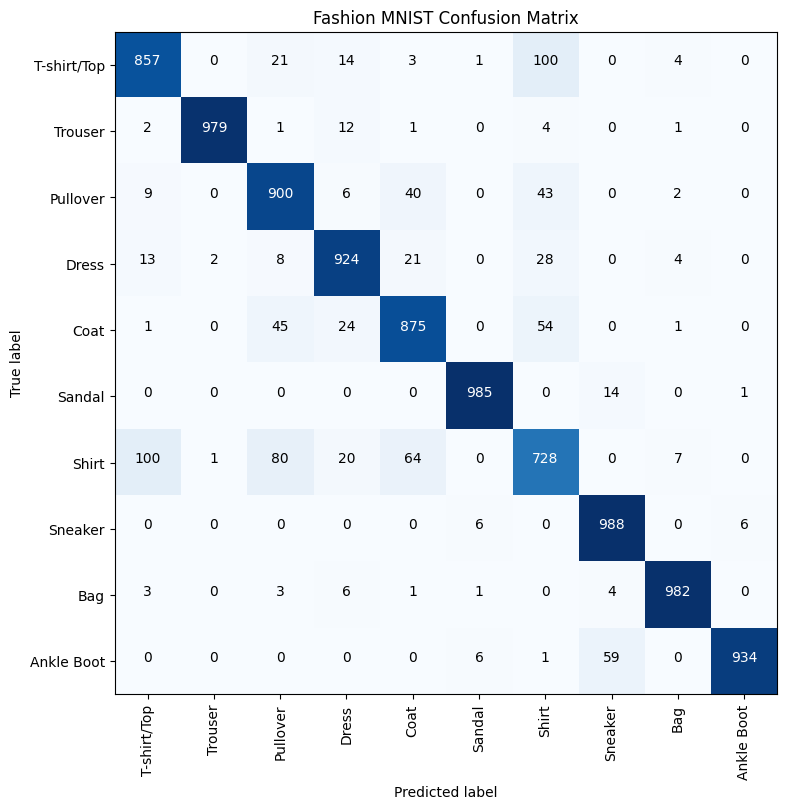

In [92]:
cm = confusion_matrix(np.argmax(y_test,axis=1), np.argmax(preds,axis=1))

plt.figure(figsize=(8,8))
plt.imshow(cm,cmap=plt.cm.Blues)
plt.title('Fashion MNIST Confusion Matrix')
plt.xticks(np.arange(10), classes, rotation=90)
plt.yticks(np.arange(10), classes)

for i, j in product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, cm[i, j],
    horizontalalignment="center",
    color="white" if cm[i, j] > 500 else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label');